# Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create plots folder
os.makedirs('../plots', exist_ok=True)

# Load data
df = pd.read_csv('../data/thyroid_final.csv')

print(f"✅ Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")


✅ Data loaded successfully!
Shape: (9060, 28)
Columns: 28


# Hyperlabel Distribution:

📊 1. HYPERLABEL DISTRIBUTION
hyperlabel
0    7160
1     502
2    1398
Name: count, dtype: int64


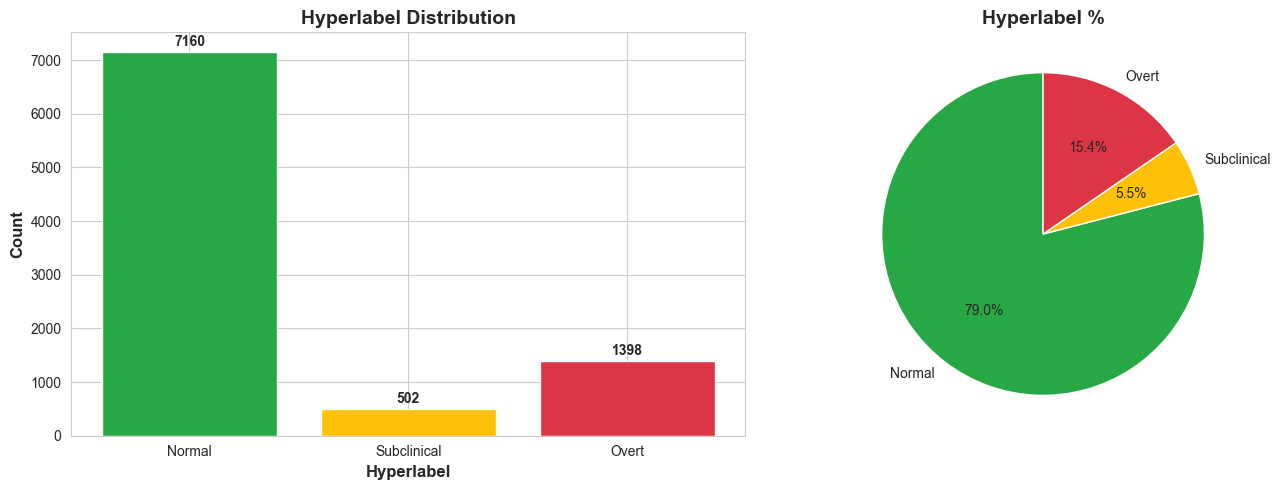


⚖️ Class Imbalance: 14.26:1


In [21]:
# 1. HYPERLABEL DISTRIBUTION
print("📊 1. HYPERLABEL DISTRIBUTION")
print("="*70)

hyperlabel_counts = df['hyperlabel'].value_counts().sort_index()
print(hyperlabel_counts)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar([0, 1, 2], hyperlabel_counts.values, 
            color=['#28a745', '#ffc107', '#dc3545'])
axes[0].set_xlabel('Hyperlabel', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Hyperlabel Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Normal', 'Subclinical', 'Overt'])

# Add counts on bars
for i, count in enumerate(hyperlabel_counts.values):
    axes[0].text(i, count + 100, str(count), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(hyperlabel_counts.values, 
            labels=['Normal', 'Subclinical', 'Overt'], 
            autopct='%1.1f%%', colors=['#28a745', '#ffc107', '#dc3545'], 
            startangle=90)
axes[1].set_title('Hyperlabel %', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../plots/01_hyperlabel_distribution.png', dpi=300)
plt.show()

print(f"\n⚖️ Class Imbalance: {hyperlabel_counts.max() / hyperlabel_counts.min():.2f}:1")


# Lab Values (TSH, T3, FTI, etc)

📊 3. LAB VALUES DISTRIBUTION


C:\Users\Click\AppData\Local\Temp\ipykernel_38704\3541863251.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(data_to_plot, labels=['Normal', 'Subclinical', 'Overt'],
C:\Users\Click\AppData\Local\Temp\ipykernel_38704\3541863251.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(data_to_plot, labels=['Normal', 'Subclinical', 'Overt'],
C:\Users\Click\AppData\Local\Temp\ipykernel_38704\3541863251.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(data_to_plot, labels=['Normal', 'Subclinical', 'Overt'],
C:\Users\Click\AppData\Local

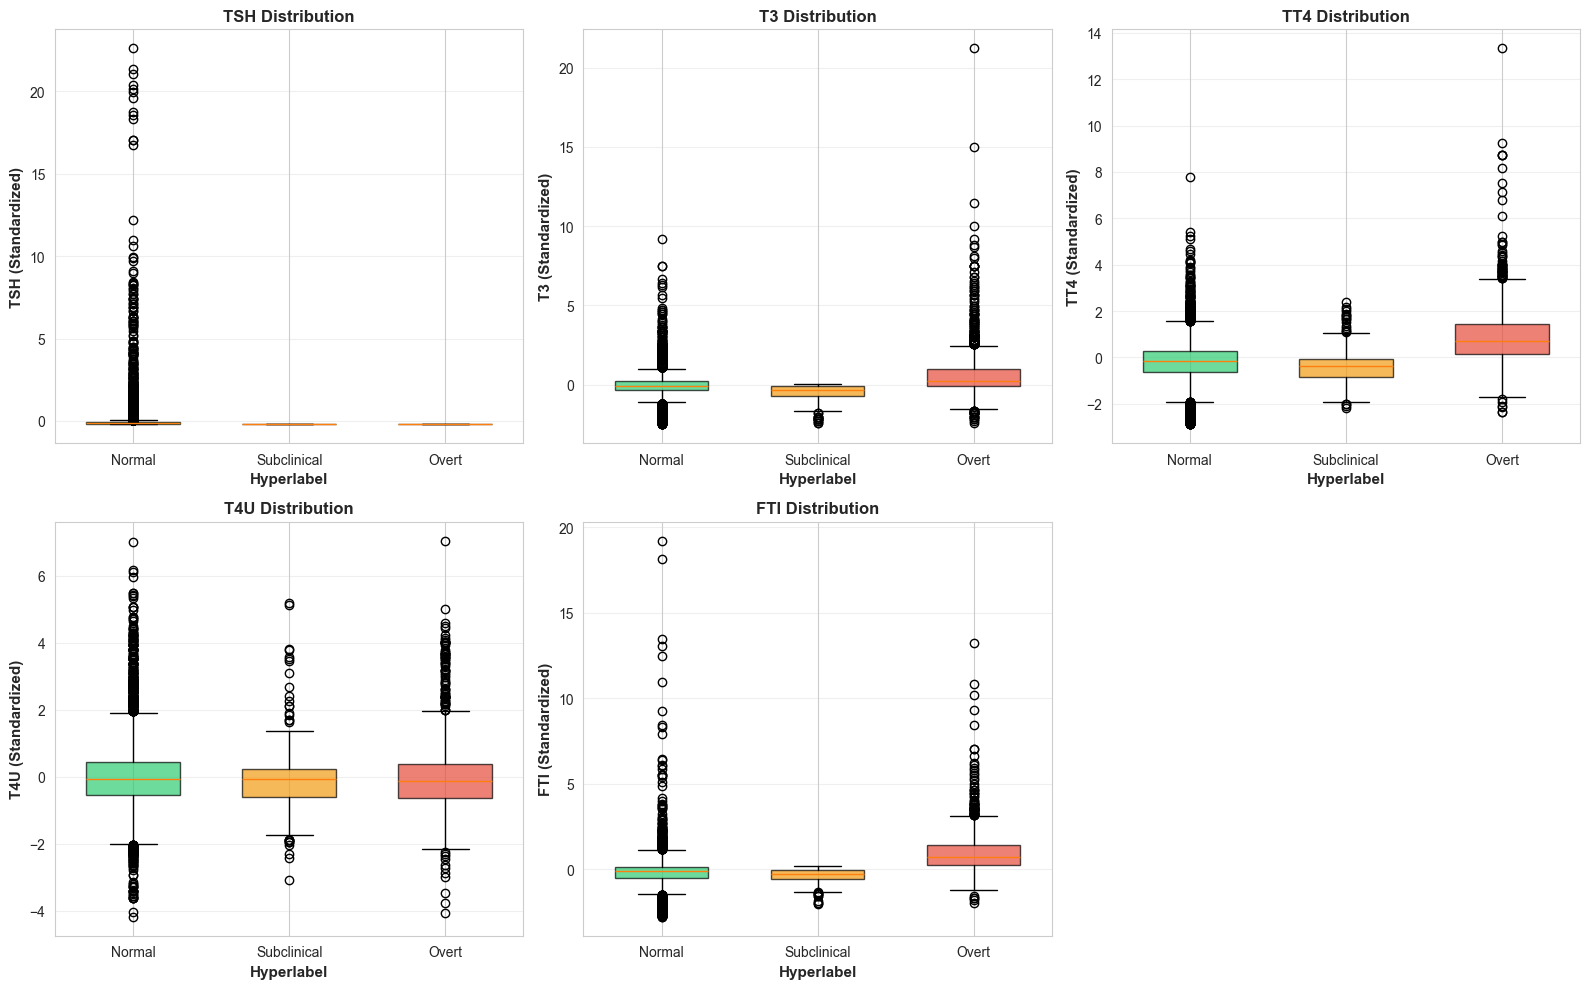


✅ Lab values plotted!


In [22]:
# 3. LAB VALUES DISTRIBUTION (TSH, T3, TT4, T4U, FTI)
print("📊 3. LAB VALUES DISTRIBUTION")
print("="*70)

# Create plot
labs = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for idx, lab in enumerate(labs):
    row = idx // 3
    col = idx % 3
    
    # Boxplot for each lab
    data_to_plot = [df[df['hyperlabel'] == i][lab].values for i in [0, 1, 2]]
    bp = axes[row, col].boxplot(data_to_plot, labels=['Normal', 'Subclinical', 'Overt'],
                                 patch_artist=True, widths=0.6)
    
    # Color boxes
    for patch, color in zip(bp['boxes'], ['#2ecc71', '#f39c12', '#e74c3c']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[row, col].set_ylabel(f'{lab} (Standardized)', fontweight='bold', fontsize=11)
    axes[row, col].set_xlabel('Hyperlabel', fontweight='bold', fontsize=11)
    axes[row, col].set_title(f'{lab} Distribution', fontweight='bold', fontsize=12)
    axes[row, col].grid(True, alpha=0.3, axis='y')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig('../plots/03_lab_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Lab values plotted!")


# Correlations

📊 4. CORRELATIONS WITH HYPERLABEL
Correlations with hyperlabel:
TT4    0.362812
FTI    0.358288
T3     0.223303
age    0.000368
T4U   -0.013766
TSH   -0.101917
Name: hyperlabel, dtype: float64


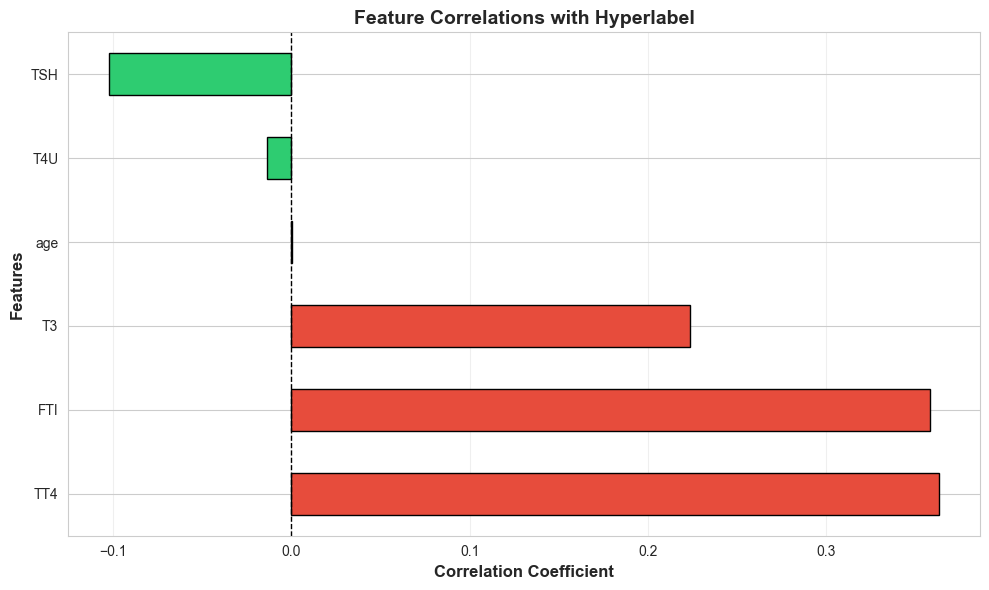

In [23]:
# 4. FEATURE CORRELATIONS WITH HYPERLABEL
print("📊 4. CORRELATIONS WITH HYPERLABEL")
print("="*70)

# Calculate correlations
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
corr_with_target = df[numerical_features + ['hyperlabel']].corr()['hyperlabel'].drop('hyperlabel').sort_values(ascending=False)

print("Correlations with hyperlabel:")
print(corr_with_target)

# Plot
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in corr_with_target]
corr_with_target.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Correlations with Hyperlabel', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../plots/04_correlations.png', dpi=300, bbox_inches='tight')
plt.show()


# train/Validation/Test Split with Stratification

STEP 4: TRAIN/VALIDATION/TEST SPLIT

📊 Dataset Overview:
Total samples: 9060
Features: 26
Target variable: hyperlabel (3 classes)

📈 Class Distribution:
  Class 0 (Normal):  7160 ( 79.0%)
  Class 1 (Subclinical):   502 (  5.5%)
  Class 2 (Overt Hyper):  1398 ( 15.4%)

🔀 Splitting data...

SPLIT RESULTS

✅ Train Set:
   Samples: 6342 (70.0%)
   Class distribution:
     Normal          :  5012 ( 79.0%)
     Subclinical     :   351 (  5.5%)
     Overt Hyper     :   979 ( 15.4%)

✅ Validation Set:
   Samples: 1359 (15.0%)
   Class distribution:
     Normal          :  1074 ( 79.0%)
     Subclinical     :    75 (  5.5%)
     Overt Hyper     :   210 ( 15.5%)

✅ Test Set:
   Samples: 1359 (15.0%)
   Class distribution:
     Normal          :  1074 ( 79.0%)
     Subclinical     :    76 (  5.6%)
     Overt Hyper     :   209 ( 15.4%)

📊 Visualizing split...


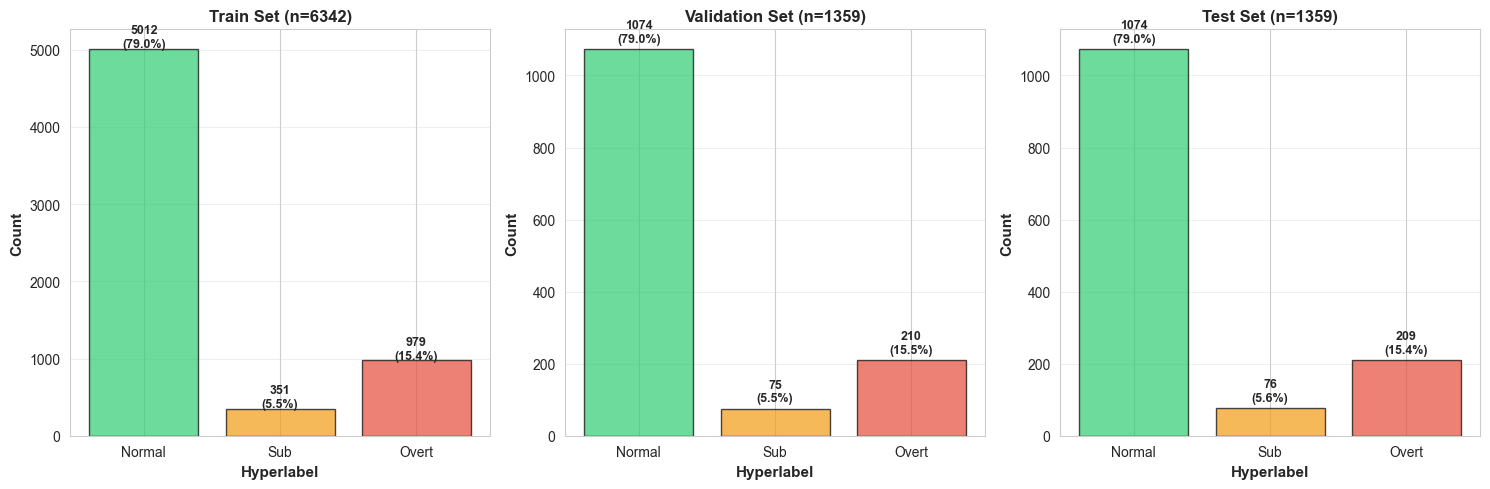


💾 Saving splits to CSV files...
   ✅ Train set saved: ../data/train_set.csv
   ✅ Validation set saved: ../data/val_set.csv
   ✅ Test set saved: ../data/test_set.csv

✅ DATA SPLIT COMPLETE!

📌 Next: Model Training (Step 5)


In [24]:
# ============================================================
# 4. TRAIN / VALIDATION / TEST SPLIT (STRATIFIED)
# ============================================================
print("="*70)
print("STEP 4: TRAIN/VALIDATION/TEST SPLIT")
print("="*70)

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['hyperlabel', 'target'], axis=1)  # Remove target labels
y = df['hyperlabel']

print(f"\n📊 Dataset Overview:")
print(f"Total samples: {len(df)}")
print(f"Features: {X.shape[1]}")
print(f"Target variable: hyperlabel (3 classes)")

# Check class distribution
print(f"\n📈 Class Distribution:")
class_dist = y.value_counts().sort_index()
for label, count in class_dist.items():
    pct = count / len(y) * 100
    names = {0: 'Normal', 1: 'Subclinical', 2: 'Overt Hyper'}
    print(f"  Class {label} ({names[label]}): {count:>5} ({pct:>5.1f}%)")

# ============================================================
# Split: 70% Train, 15% Validation, 15% Test (STRATIFIED)
# ============================================================
print(f"\n🔀 Splitting data...")

# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.30,           # 30% for validation + test
    stratify=y,                # Keep class proportions!
    random_state=42
)

# Second split: 50% of temp = 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,            # 50% of 30% = 15%
    stratify=y_temp,           # Keep class proportions!
    random_state=42
)

# ============================================================
# Display split results
# ============================================================
print("\n" + "="*70)
print("SPLIT RESULTS")
print("="*70)

print(f"\n✅ Train Set:")
print(f"   Samples: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"   Class distribution:")
for label, count in y_train.value_counts().sort_index().items():
    pct = count / len(y_train) * 100
    names = {0: 'Normal', 1: 'Subclinical', 2: 'Overt Hyper'}
    print(f"     {names[label]:15} : {count:>5} ({pct:>5.1f}%)")

print(f"\n✅ Validation Set:")
print(f"   Samples: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"   Class distribution:")
for label, count in y_val.value_counts().sort_index().items():
    pct = count / len(y_val) * 100
    names = {0: 'Normal', 1: 'Subclinical', 2: 'Overt Hyper'}
    print(f"     {names[label]:15} : {count:>5} ({pct:>5.1f}%)")

print(f"\n✅ Test Set:")
print(f"   Samples: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")
print(f"   Class distribution:")
for label, count in y_test.value_counts().sort_index().items():
    pct = count / len(y_test) * 100
    names = {0: 'Normal', 1: 'Subclinical', 2: 'Overt Hyper'}
    print(f"     {names[label]:15} : {count:>5} ({pct:>5.1f}%)")

# ============================================================
# Visualize the split
# ============================================================
print("\n📊 Visualizing split...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for each set
for idx, (y_set, title) in enumerate([(y_train, 'Train'), (y_val, 'Validation'), (y_test, 'Test')]):
    counts = y_set.value_counts().sort_index()
    colors = ['#2ecc71', '#f39c12', '#e74c3c']
    
    axes[idx].bar([0, 1, 2], counts.values, color=colors, alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Hyperlabel', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Count', fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{title} Set (n={len(y_set)})', fontweight='bold', fontsize=12)
    axes[idx].set_xticks([0, 1, 2])
    axes[idx].set_xticklabels(['Normal', 'Sub', 'Overt'])
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add percentages on bars
    for i, count in enumerate(counts.values):
        pct = count / len(y_set) * 100
        axes[idx].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                      ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../plots/05_data_split.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================
# Save the splits
# ============================================================
print("\n💾 Saving splits to CSV files...")

# Save train set
train_df = X_train.copy()
train_df['hyperlabel'] = y_train
train_df.to_csv('../data/train_set.csv', index=False)
print(f"   ✅ Train set saved: ../data/train_set.csv")

# Save validation set
val_df = X_val.copy()
val_df['hyperlabel'] = y_val
val_df.to_csv('../data/val_set.csv', index=False)
print(f"   ✅ Validation set saved: ../data/val_set.csv")

# Save test set
test_df = X_test.copy()
test_df['hyperlabel'] = y_test
test_df.to_csv('../data/test_set.csv', index=False)
print(f"   ✅ Test set saved: ../data/test_set.csv")

print("\n" + "="*70)
print("✅ DATA SPLIT COMPLETE!")
print("="*70)
print("\n📌 Next: Model Training (Step 5)")
